# Muhamed Amr Shehata    
# 20191565917                         
# 3B

# Maximous Fr Ayoub             
# 20191566996                         
# 4A

# Hady Ehab Ahmed                
# 20191450774                         
# 4B

# Yousif Muhamed Amin         
# 20191477936                         
# 4B

# Abanoub Samir Gabriel       
# 20191480244                         
# 1A 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "E:/Users/Mohamed/Desktop/DATASET"
CATEGORIES =["NORMAL","PNEUMONIA"]
img_size=256

In [ ]:
# Extracting model's training dataset using it's path.
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_img_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_img_array,class_num])
            except exception as e:
                pass
        
create_training_data()            

In [9]:
# Shuffle dataset to be more efficient for our model.
import random

random.shuffle(training_data)

In [10]:
x_training=[]
y_training=[]

In [ ]:
# Cause model.fit() can't take list dataset so we are gonna use numpy lib. to customize our list to a numpy array.
for feature, label in training_data:
    x_training.append(feature)
    y_training.append(label)
x_training=np.array(x_training).reshape(-1,img_size,img_size,1)   
y_training=np.array(y_training)
x_training = x_training.astype('float32')
y_training = y_training.astype('float32')

In [12]:
# Creating NN layers by using keras lib. 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

#type of the model
model=Sequential()

#inpyt layer
model.add(Conv2D(32,3,activation="relu",input_shape=x_training.shape[1:]))
model.add(MaxPooling2D(2))

#dropout layer drop 0.5 unit of each layer in nn
model.add(Dropout(rate=0.5))

#hidden layers
model.add(Conv2D(64,3,activation="relu"))
model.add(MaxPooling2D(2))

#flatten the data for dense layer 
model.add(Flatten(input_shape=(256,256)))
model.add(Dense(64,activation="relu"))

#output layer
model.add(Dense(1,activation="sigmoid"))


In [13]:
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=['accuracy'])

In [14]:
# Normalize pixels.
x_training=x_training/255.0

# Let our model to learn from the available training dataset.
model.fit(x_training,y_training,epochs=5,batch_size=16,validation_split=0.1,steps_per_epoch=50)

Epoch 1/5
50/50 [==============================] - 42s 791ms/step - loss: 0.5748 - accuracy: 0.7237 - val_loss: 0.6030 - val_accuracy: 0.7605
Epoch 2/5
50/50 [==============================] - 40s 794ms/step - loss: 0.4616 - accuracy: 0.8112 - val_loss: 0.4642 - val_accuracy: 0.7605
Epoch 3/5
50/50 [==============================] - 40s 806ms/step - loss: 0.4065 - accuracy: 0.8163 - val_loss: 0.3966 - val_accuracy: 0.8103
Epoch 4/5
50/50 [==============================] - 42s 851ms/step - loss: 0.3665 - accuracy: 0.8350 - val_loss: 0.3605 - val_accuracy: 0.8985
Epoch 5/5
50/50 [==============================] - 39s 780ms/step - loss: 0.2822 - accuracy: 0.8813 - val_loss: 0.3054 - val_accuracy: 0.9444


In [32]:
# Extracting model's test dataset using it's path.
DATADIR2 = "E:/Users/Mohamed/Desktop/DATASET/test"
test_data=[]
def create_test_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR2, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_img_array=cv2.resize(img_array,(img_size,img_size))
                test_data.append([new_img_array,class_num])
            except exception as e:
                pass
        
create_test_data()  

In [47]:
import random

random.shuffle(test_data)

In [52]:
x_test=[]
y_test=[]

In [53]:
# Also model.evaluate() function can't take list as a parameter.
for feature, label in test_data:
    x_test.append(feature)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,img_size,img_size,1)   
y_test=np.array(y_test)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1.

In [50]:
# Normalize pixels.
x_test=x_test/255.0
# Evaluate our model by it's accuracy and loss terms.
test_loss,test_accuracy=model.evaluate(x_test,y_test,steps=624)

624/624 [==============================] - 25s 40ms/step - loss: 0.4358 - accuracy: 0.8077


In [37]:
# Prepares image for model.predict() function.
def prepare(file_path):
    img_array = cv2.imread(file_path,cv2.IMREAD_GRAYSCALE)
    new_img_array=cv2.resize(img_array,(img_size,img_size))
    return new_img_array.reshape(-1,img_size,img_size,1)

In [38]:
prediction=model.predict([prepare('E:/Users/Mohamed/Desktop/DATASET/test/PNEUMONIA/person1_virus_6.jpeg')])
print(CATEGORIES[int(prediction[0][0])])

PNEUMONIA


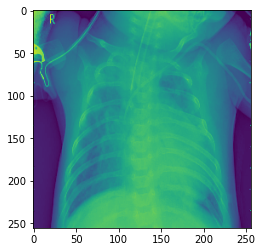

In [39]:
img=prepare('E:/Users/Mohamed/Desktop/DATASET/test/PNEUMONIA/person1_virus_6.jpeg')
img=np.array(img).reshape(img_size,img_size,1)
plt.imshow(img)
plt.show()